##### <b>Import Python Library</b>

In [1]:
%pip install matplotlib
%pip install seaborn
%matplotlib inline

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


##### <b>Import Data</b>

###### <b>Import SET50 Index</b>

In [2]:
url = 'https://raw.githubusercontent.com/SamapanThongmee/Scrap_SET50_Index_Futures_Data/main/SET50_2006_2023.csv'
SET50 = pd.read_csv(url).iloc[76:,1:]
numerical_columns = SET50.columns[1:]
SET50[numerical_columns] = SET50[numerical_columns].apply(lambda x: x.map(lambda y: pd.to_numeric(str(y).replace(',', ''), errors='coerce')))
SET50 = SET50[['Date','Close']].sort_values(by='Date').drop_duplicates(subset='Date', keep='last').reset_index(drop=True)
SET50['Date']= pd.to_datetime(SET50['Date'])
SET50.head()

,Date,Close
0,2006-04-26,536.63000
1,2006-04-27,533.85999
2,2006-05-02,539.40002
3,2006-05-03,533.78998
4,2006-05-08,547.53003


###### <b>Import SET50 Index Futures</b>

In [3]:
url = 'https://raw.githubusercontent.com/SamapanThongmee/Scrap_SET50_Index_Futures_Data/main/SET50_Index_Futures_Data_2006_2023.csv'
Futures = pd.read_csv(url)
Futures = Futures.pivot(index='Date', columns='Symbol', values='Close').reset_index()
numerical_columns = Futures.columns[1:]
Futures[numerical_columns] = Futures[numerical_columns].apply(lambda x: x.map(lambda y: pd.to_numeric(str(y).replace(',', ''), errors='coerce')))
Futures = Futures.sort_values(by='Date').drop_duplicates(subset='Date', keep='last').reset_index(drop=True)
Futures['Date'] = pd.to_datetime(Futures['Date'])
Futures.head()

Symbol,Date,S50H07,S50H08,S50H09,S50H10,S50H11,S50H12,S50H13,S50H14,S50H15,...,S50Z14,S50Z15,S50Z16,S50Z17,S50Z18,S50Z19,S50Z20,S50Z21,S50Z22,S50Z23
0,2006-04-28,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2006-05-02,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2006-05-03,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2006-05-04,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006-05-08,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
SET50_Futures = SET50.merge(Futures, on='Date', how='inner').reset_index(drop=True)
SET50_Futures = SET50_Futures.rename(columns={'Close':'SET50'})
SET50_Futures.head()

,Date,SET50,S50H07,S50H08,S50H09,S50H10,S50H11,S50H12,S50H13,S50H14,...,S50Z14,S50Z15,S50Z16,S50Z17,S50Z18,S50Z19,S50Z20,S50Z21,S50Z22,S50Z23
0,2006-05-02,539.40002,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2006-05-03,533.78998,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2006-05-08,547.53003,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2006-05-09,546.14001,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006-05-10,544.67999,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### <b>SET50 Index Contango and Backwardation: Statistics</b>

In [5]:
def calculate_statistics(lst, series_name):
    lst_without_null = pd.Series(lst).dropna()
    percentiles = [0.1, 2.3, 15.9, 50, 84.1, 97.7, 99.9]

    stats = [series_name,
             lst_without_null.min(),
             lst_without_null.max(),
             lst_without_null.median(),
             lst_without_null.mean(),
             lst_without_null.std(),
             len(lst_without_null)]

    if not lst_without_null.empty:
        percentiles_values = np.percentile(lst_without_null, percentiles)
        stats.extend(percentiles_values)
    else:
        stats.extend([np.nan] * len(percentiles))

    return stats

# Extract series names
series_names = ['H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23',
                'M06', 'M07', 'M08', 'M09', 'M10', 'M11', 'M12', 'M13', 'M14', 'M15', 'M16', 'M17', 'M18', 'M19', 'M20', 'M21', 'M22', 'M23',
                'U06', 'U07', 'U08', 'U09', 'U10', 'U11', 'U12', 'U13', 'U14', 'U15', 'U16', 'U17', 'U18', 'U19', 'U20', 'U21', 'U22', 'U23',
                'Z06', 'Z07', 'Z08', 'Z09', 'Z10', 'Z11', 'Z12', 'Z13', 'Z14', 'Z15', 'Z16', 'Z17', 'Z18', 'Z19', 'Z20', 'Z21', 'Z22', 'Z23']

# Extract series data
series_data = [SET50_Futures[['Date', 'SET50', f'S50{series}']].dropna().reset_index(drop=True) for series in series_names]

# Calculate differences and store in a dictionary
diff_dict = {}
for series_name, series_df in zip(series_names, series_data):
    series_df['Diff'] = series_df['SET50'] - series_df[f'S50{series_name}']
    diff_dict[f'SET50_{series_name}'] = list(series_df['Diff'])

# Calculate statistics
data = []
for series_name, lst in diff_dict.items():
    filtered_lst = [value for value in lst if -100 <= value <= 100]
    stats = calculate_statistics(filtered_lst, series_name)
    data.append(stats)

# Create DataFrame
columns = ['Series', 'min', 'max', 'median', 'mean', 'sd', 'count', '0.1%', '2.3%', '15.9%', '50%', '84.1%', '97.7%', '99.9%']
df = pd.DataFrame(data, columns=columns)
df = df[['Series', 'min', '0.1%', '2.3%', '15.9%', 'median', '84.1%', '97.7%', '99.9%', 'max', 'mean', 'sd', 'count']]
SET50_Futures = df
SET50_Futures

,Series,min,0.1%,2.3%,15.9%,median,84.1%,97.7%,99.9%,max,mean,sd,count
0,SET50_H07,-30.04001,-27.730157,-9.647508,-6.616299,-1.675005,3.694900,8.420901,14.759351,15.19000,-1.464117,5.472129,136
1,SET50_H08,-15.50001,-15.434762,-12.131263,-6.281268,0.054995,5.237974,12.094737,18.260998,18.63000,-0.364512,5.798732,226
2,SET50_H09,-11.17999,-10.315887,-6.031978,0.453900,4.769980,8.638890,12.700081,17.573468,18.00000,4.544279,4.589235,222
3,SET50_H10,-4.09003,-3.983098,-2.161410,1.178214,4.880000,9.519037,15.334530,26.428602,28.81000,5.434877,4.554643,244
4,SET50_H11,-6.01001,-5.983612,-4.814805,-0.619995,4.670000,9.418790,12.585604,14.448780,14.47998,4.408550,4.712138,241
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,SET50_Z19,-3.37000,-3.248000,-1.763880,1.193700,4.730000,13.608560,17.715520,19.662160,19.75000,6.241308,5.596770,245
67,SET50_Z20,-7.68999,-6.878377,-1.823304,1.378217,7.934995,15.580007,19.390521,25.592310,25.75997,8.304426,6.261430,244
68,SET50_Z21,-1.07000,-0.961543,-0.260560,1.855540,6.400005,9.708107,14.289396,15.912792,15.92002,6.248843,3.794983,242
69,SET50_Z22,-3.95997,-3.747892,-2.422855,0.805957,8.840010,13.866803,18.631670,20.272020,20.46000,8.031281,5.881461,242


###### <b>SET50 Index Contango: Sort by median</b>

In [6]:
SET50_Futures_Contango = SET50_Futures.sort_values(by='median', ascending=True).head(10).reset_index(drop=True)
SET50_Futures_Contango

,Series,min,0.1%,2.3%,15.9%,median,84.1%,97.7%,99.9%,max,mean,sd,count
0,SET50_Z06,-22.10999,-21.818723,-16.266460,-6.918539,-3.035010,5.152391,11.485279,17.601510,18.20001,-2.241119,6.910514,134
1,SET50_H07,-30.04001,-27.730157,-9.647508,-6.616299,-1.675005,3.694900,8.420901,14.759351,15.19000,-1.464117,5.472129,136
2,SET50_M07,-32.94001,-29.589696,-9.773912,-6.006637,-1.465000,3.253152,5.783487,9.617768,10.13000,-1.646868,4.809364,182
3,SET50_Z07,-13.50001,-13.364048,-10.334573,-5.517215,-1.179990,4.304445,12.899807,15.269896,15.40997,-0.768937,5.412229,207
4,SET50_M06,-14.14000,-14.112100,-13.498293,-9.779402,-1.070000,6.760021,11.176700,11.552900,11.57000,-0.839032,7.566645,31
5,SET50_H08,-15.50001,-15.434762,-12.131263,-6.281268,0.054995,5.237974,12.094737,18.260998,18.63000,-0.364512,5.798732,226
6,SET50_M08,-25.99999,-22.890137,-10.786530,-6.224956,0.109970,5.291470,11.851835,18.965435,19.63000,-0.259360,5.896636,235
7,SET50_U07,-42.04001,-35.546250,-9.009914,-4.178551,0.299990,5.422071,13.807030,17.105224,17.23003,0.348613,5.874337,209
8,SET50_U06,-19.10999,-18.768752,-13.490523,-5.799919,0.859990,9.179089,13.199643,17.788410,18.10001,1.332857,7.568975,77
9,SET50_U08,-15.37000,-14.954633,-10.825873,-4.964710,1.390010,6.118560,10.006450,14.287943,14.59003,0.773124,5.571817,237


###### <b>SET50 Index Backwardation: Sort by median</b>

In [7]:
SET50_Futures_Backwardation = SET50_Futures.sort_values(by='median', ascending=False).head(10).reset_index(drop=True)
SET50_Futures_Backwardation

,Series,min,0.1%,2.3%,15.9%,median,84.1%,97.7%,99.9%,max,mean,sd,count
0,SET50_M16,-5.02998,-4.532630,-2.390934,3.049670,23.70000,31.192700,35.138409,37.574528,37.91998,19.930528,11.848964,246
1,SET50_U16,-3.09003,-3.019265,-0.117012,5.423884,18.66001,37.381586,42.929228,44.884822,45.08002,20.507429,13.978628,245
2,SET50_H16,-6.14001,-5.160005,-0.414605,7.625501,15.15499,24.093179,28.696593,32.270528,32.41998,15.401056,7.694794,246
3,SET50_U15,-1.96002,-1.789918,1.450680,7.335484,12.32000,17.200820,22.912326,25.424110,25.48000,12.311927,5.272642,244
4,SET50_U17,-5.74000,-5.661600,-1.811900,3.735151,11.93000,18.913149,22.991898,24.915900,24.95999,10.495244,7.183415,246
5,SET50_U20,-2.16998,-1.772272,0.410594,4.311830,11.50000,15.492040,18.371760,23.916020,24.05997,10.366449,5.270705,245
6,SET50_Z15,-5.31997,-4.454895,-0.815760,2.869103,11.34001,17.437260,22.732614,27.943707,28.41998,10.764550,6.747456,244
7,SET50_Z16,-16.82998,-13.611627,-2.821158,0.603852,10.13000,40.937876,49.991044,51.315860,51.35002,14.826369,16.430380,245
8,SET50_U22,-1.17002,-0.855415,1.448460,6.018619,9.90002,14.291320,18.077371,19.568040,19.66000,9.909547,4.066813,243
9,SET50_U14,-3.61990,-3.375900,0.606760,4.353480,9.86990,15.973014,22.108636,29.218620,30.78998,10.214491,5.765491,245


###### <b>SET50 Index Contango and Backwardation: Visualization</b>

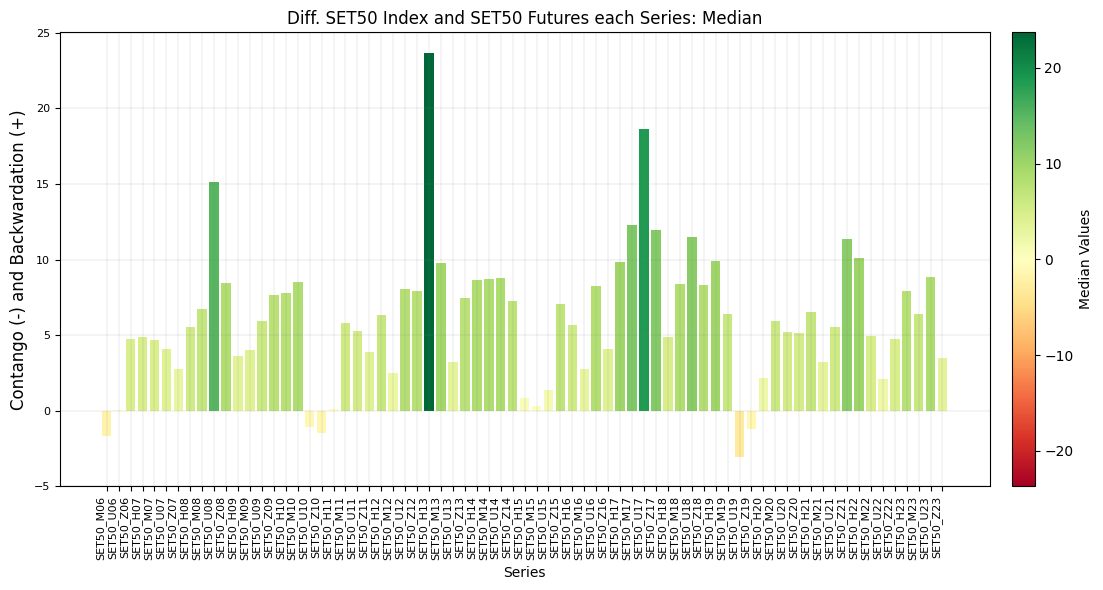

In [8]:
SET50_Futures_Plot = SET50_Futures[['Series', 'median']]

series = SET50_Futures_Plot['Series']
median_values = SET50_Futures_Plot['median']

custom_order = [
    'SET50_M06', 'SET50_U06', 'SET50_Z06',
    'SET50_H07', 'SET50_M07', 'SET50_U07', 'SET50_Z07',
    'SET50_H08', 'SET50_M08', 'SET50_U08', 'SET50_Z08',
    'SET50_H09', 'SET50_M09', 'SET50_U09', 'SET50_Z09',
    'SET50_H10', 'SET50_M10', 'SET50_U10', 'SET50_Z10',
    'SET50_H11', 'SET50_M11', 'SET50_U11', 'SET50_Z11',
    'SET50_H12', 'SET50_M12', 'SET50_U12', 'SET50_Z12',
    'SET50_H13', 'SET50_M13', 'SET50_U13', 'SET50_Z13',
    'SET50_H14', 'SET50_M14', 'SET50_U14', 'SET50_Z14',
    'SET50_H15', 'SET50_M15', 'SET50_U15', 'SET50_Z15',
    'SET50_H16', 'SET50_M16', 'SET50_U16', 'SET50_Z16',
    'SET50_H17', 'SET50_M17', 'SET50_U17', 'SET50_Z17',
    'SET50_H18', 'SET50_M18', 'SET50_U18', 'SET50_Z18',
    'SET50_H19', 'SET50_M19', 'SET50_U19', 'SET50_Z19',
    'SET50_H20', 'SET50_M20', 'SET50_U20', 'SET50_Z20',
    'SET50_H21', 'SET50_M21', 'SET50_U21', 'SET50_Z21',
    'SET50_H22', 'SET50_M22', 'SET50_U22', 'SET50_Z22',
    'SET50_H23', 'SET50_M23', 'SET50_U23', 'SET50_Z23'
]

SET50_Futures_Plot['Custom_Order'] = SET50_Futures_Plot['Series'].astype(
    pd.CategoricalDtype(categories=custom_order, ordered=True)
)

SET50_Futures_Plot_sorted = SET50_Futures_Plot.sort_values(by='Custom_Order')
SET50_Futures_Plot_sorted = SET50_Futures_Plot_sorted.drop('Custom_Order', axis=1)

norm = mcolors.Normalize(vmin=-max(abs(median_values)), vmax=max(abs(median_values)))
colors = plt.cm.RdYlGn(norm(median_values))

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(SET50_Futures_Plot_sorted['Series'], median_values, color=colors)
ax.set_xlabel('Series', fontsize=10)
ax.set_ylabel('Contango (-) and Backwardation (+)', fontsize=12)
ax.set_title('Diff. SET50 Index and SET50 Futures each Series: Median')

ax.set_yticks(np.arange(-5, 26, 5))
ax.tick_params(axis='both', which='major', labelsize=8)

sm = plt.cm.ScalarMappable(cmap=plt.cm.RdYlGn, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', pad=0.02)
cbar.set_label('Median Values')

# Customize x-axis labels
ax.set_xticks(range(len(SET50_Futures_Plot_sorted['Series'])))
ax.set_xticklabels(SET50_Futures_Plot_sorted['Series'], rotation=90, ha='right', fontsize=8)

# Add grid lines with grey50 color and 0.4 opacity
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

# Display the plot
plt.tight_layout()
plt.show()

##### <b>SET50 Index Futures Contango and Backwardation: Statistics</b>

###### <b>SET50 Index Futures Contango and Backwardation: Data Preparation</b>

In [9]:
url = 'https://raw.githubusercontent.com/SamapanThongmee/Scrap_SET50_Index_Futures_Data/main/SET50_Index_Futures_Data_2006_2023.csv'
Futures = pd.read_csv(url)
Futures = Futures.pivot(index='Date', columns='Symbol', values='Close').reset_index()
numerical_columns = Futures.columns[1:]
Futures[numerical_columns] = Futures[numerical_columns].apply(lambda x: x.map(lambda y: pd.to_numeric(str(y).replace(',', ''), errors='coerce')))
Futures = Futures.sort_values(by='Date').drop_duplicates(subset='Date', keep='last').reset_index(drop=True)
Futures['Date'] = pd.to_datetime(Futures['Date'])
Futures.head()

Symbol,Date,S50H07,S50H08,S50H09,S50H10,S50H11,S50H12,S50H13,S50H14,S50H15,...,S50Z14,S50Z15,S50Z16,S50Z17,S50Z18,S50Z19,S50Z20,S50Z21,S50Z22,S50Z23
0,2006-04-28,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2006-05-02,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2006-05-03,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2006-05-04,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006-05-08,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
M06U06 = Futures[['Date', 'S50M06', 'S50U06']].dropna().reset_index(drop=True)
U06Z06 = Futures[['Date', 'S50U06', 'S50Z06']].dropna().reset_index(drop=True)
Z06H07 = Futures[['Date', 'S50Z06', 'S50H07']].dropna().reset_index(drop=True)

H07M07 = Futures[['Date', 'S50H07', 'S50M07']].dropna().reset_index(drop=True)
M07U07 = Futures[['Date', 'S50M07', 'S50U07']].dropna().reset_index(drop=True)
U07Z07 = Futures[['Date', 'S50U07', 'S50Z07']].dropna().reset_index(drop=True)
Z07H08 = Futures[['Date', 'S50Z07', 'S50H08']].dropna().reset_index(drop=True)

H08M08 = Futures[['Date', 'S50H08', 'S50M08']].dropna().reset_index(drop=True)
M08U08 = Futures[['Date', 'S50M08', 'S50U08']].dropna().reset_index(drop=True)
U08Z08 = Futures[['Date', 'S50U08', 'S50Z08']].dropna().reset_index(drop=True)
Z08H09 = Futures[['Date', 'S50Z08', 'S50H09']].dropna().reset_index(drop=True)

H09M09 = Futures[['Date', 'S50H09', 'S50M09']].dropna().reset_index(drop=True)
M09U09 = Futures[['Date', 'S50M09', 'S50U09']].dropna().reset_index(drop=True)
U09Z09 = Futures[['Date', 'S50U09', 'S50Z09']].dropna().reset_index(drop=True)
Z09H10 = Futures[['Date', 'S50Z09', 'S50H10']].dropna().reset_index(drop=True)

H10M10 = Futures[['Date', 'S50H10', 'S50M10']].dropna().reset_index(drop=True)
M10U10 = Futures[['Date', 'S50M10', 'S50U10']].dropna().reset_index(drop=True)
U10Z10 = Futures[['Date', 'S50U10', 'S50Z10']].dropna().reset_index(drop=True)
Z10H11 = Futures[['Date', 'S50Z10', 'S50H11']].dropna().reset_index(drop=True)

H11M11 = Futures[['Date', 'S50H11', 'S50M11']].dropna().reset_index(drop=True)
M11U11 = Futures[['Date', 'S50M11', 'S50U11']].dropna().reset_index(drop=True)
U11Z11 = Futures[['Date', 'S50U11', 'S50Z11']].dropna().reset_index(drop=True)
Z11H12 = Futures[['Date', 'S50Z11', 'S50H12']].dropna().reset_index(drop=True)

H12M12 = Futures[['Date', 'S50H12', 'S50M12']].dropna().reset_index(drop=True)
M12U12 = Futures[['Date', 'S50M12', 'S50U12']].dropna().reset_index(drop=True)
U12Z12 = Futures[['Date', 'S50U12', 'S50Z12']].dropna().reset_index(drop=True)
Z12H13 = Futures[['Date', 'S50Z12', 'S50H13']].dropna().reset_index(drop=True)

H13M13 = Futures[['Date', 'S50H13', 'S50M13']].dropna().reset_index(drop=True)
M13U13 = Futures[['Date', 'S50M13', 'S50U13']].dropna().reset_index(drop=True)
U13Z13 = Futures[['Date', 'S50U13', 'S50Z13']].dropna().reset_index(drop=True)
Z13H14 = Futures[['Date', 'S50Z13', 'S50H14']].dropna().reset_index(drop=True)

H14M14 = Futures[['Date', 'S50H14', 'S50M14']].dropna().reset_index(drop=True)
M14U14 = Futures[['Date', 'S50M14', 'S50U14']].dropna().reset_index(drop=True)
U14Z14 = Futures[['Date', 'S50U14', 'S50Z14']].dropna().reset_index(drop=True)
Z14H15 = Futures[['Date', 'S50Z14', 'S50H15']].dropna().reset_index(drop=True)

H15M15 = Futures[['Date', 'S50H15', 'S50M15']].dropna().reset_index(drop=True)
M15U15 = Futures[['Date', 'S50M15', 'S50U15']].dropna().reset_index(drop=True)
U15Z15 = Futures[['Date', 'S50U15', 'S50Z15']].dropna().reset_index(drop=True)
Z15H16 = Futures[['Date', 'S50Z15', 'S50H16']].dropna().reset_index(drop=True)

H16M16 = Futures[['Date', 'S50H16', 'S50M16']].dropna().reset_index(drop=True)
M16U16 = Futures[['Date', 'S50M16', 'S50U16']].dropna().reset_index(drop=True)
U16Z16 = Futures[['Date', 'S50U16', 'S50Z16']].dropna().reset_index(drop=True)
Z16H17 = Futures[['Date', 'S50Z16', 'S50H17']].dropna().reset_index(drop=True)

H17M17 = Futures[['Date', 'S50H17', 'S50M17']].dropna().reset_index(drop=True)
M17U17 = Futures[['Date', 'S50M17', 'S50U17']].dropna().reset_index(drop=True)
U17Z17 = Futures[['Date', 'S50U17', 'S50Z17']].dropna().reset_index(drop=True)
Z17H18 = Futures[['Date', 'S50Z17', 'S50H18']].dropna().reset_index(drop=True)

H18M18 = Futures[['Date', 'S50H18', 'S50M18']].dropna().reset_index(drop=True)
M18U18 = Futures[['Date', 'S50M18', 'S50U18']].dropna().reset_index(drop=True)
U18Z18 = Futures[['Date', 'S50U18', 'S50Z18']].dropna().reset_index(drop=True)
Z18H19 = Futures[['Date', 'S50Z18', 'S50H19']].dropna().reset_index(drop=True)

H19M19 = Futures[['Date', 'S50H19', 'S50M19']].dropna().reset_index(drop=True)
M19U19 = Futures[['Date', 'S50M19', 'S50U19']].dropna().reset_index(drop=True)
U19Z19 = Futures[['Date', 'S50U19', 'S50Z19']].dropna().reset_index(drop=True)
Z19H20 = Futures[['Date', 'S50Z19', 'S50H20']].dropna().reset_index(drop=True)

H20M20 = Futures[['Date', 'S50H20', 'S50M20']].dropna().reset_index(drop=True)
M20U20 = Futures[['Date', 'S50M20', 'S50U20']].dropna().reset_index(drop=True)
U20Z20 = Futures[['Date', 'S50U20', 'S50Z20']].dropna().reset_index(drop=True)
Z20H21 = Futures[['Date', 'S50Z20', 'S50H21']].dropna().reset_index(drop=True)

H21M21 = Futures[['Date', 'S50H21', 'S50M21']].dropna().reset_index(drop=True)
M21U21 = Futures[['Date', 'S50M21', 'S50U21']].dropna().reset_index(drop=True)
U21Z21 = Futures[['Date', 'S50U21', 'S50Z21']].dropna().reset_index(drop=True)
Z21H22 = Futures[['Date', 'S50Z21', 'S50H22']].dropna().reset_index(drop=True)

H22M22 = Futures[['Date', 'S50H22', 'S50M22']].dropna().reset_index(drop=True)
M22U22 = Futures[['Date', 'S50M22', 'S50U22']].dropna().reset_index(drop=True)
U22Z22 = Futures[['Date', 'S50U22', 'S50Z22']].dropna().reset_index(drop=True)
Z22H23 = Futures[['Date', 'S50Z22', 'S50H23']].dropna().reset_index(drop=True)

H23M23 = Futures[['Date', 'S50H23', 'S50M23']].dropna().reset_index(drop=True)
M23U23 = Futures[['Date', 'S50M23', 'S50U23']].dropna().reset_index(drop=True)
U23Z23 = Futures[['Date', 'S50U23', 'S50Z23']].dropna().reset_index(drop=True)

M06U06['S50M06'] = pd.to_numeric(M06U06['S50M06'], errors='coerce')
M06U06['S50U06'] = pd.to_numeric(M06U06['S50U06'], errors='coerce')
U06Z06['S50U06'] = pd.to_numeric(U06Z06['S50U06'], errors='coerce')
U06Z06['S50Z06'] = pd.to_numeric(U06Z06['S50Z06'], errors='coerce')
Z06H07['S50Z06'] = pd.to_numeric(Z06H07['S50Z06'], errors='coerce')
Z06H07['S50H07'] = pd.to_numeric(Z06H07['S50H07'], errors='coerce')

H07M07['S50H07'] = pd.to_numeric(H07M07['S50H07'], errors='coerce')
H07M07['S50M07'] = pd.to_numeric(H07M07['S50M07'], errors='coerce')
M07U07['S50M07'] = pd.to_numeric(M07U07['S50M07'], errors='coerce')
M07U07['S50U07'] = pd.to_numeric(M07U07['S50U07'], errors='coerce')
U07Z07['S50U07'] = pd.to_numeric(U07Z07['S50U07'], errors='coerce')
U07Z07['S50Z07'] = pd.to_numeric(U07Z07['S50Z07'], errors='coerce')
Z07H08['S50Z07'] = pd.to_numeric(Z07H08['S50Z07'], errors='coerce')
Z07H08['S50H08'] = pd.to_numeric(Z07H08['S50H08'], errors='coerce')

H08M08['S50H08'] = pd.to_numeric(H08M08['S50H08'], errors='coerce')
H08M08['S50M08'] = pd.to_numeric(H08M08['S50M08'], errors='coerce')
M08U08['S50M08'] = pd.to_numeric(M08U08['S50M08'], errors='coerce')
M08U08['S50U08'] = pd.to_numeric(M08U08['S50U08'], errors='coerce')
U08Z08['S50U08'] = pd.to_numeric(U08Z08['S50U08'], errors='coerce')
U08Z08['S50Z08'] = pd.to_numeric(U08Z08['S50Z08'], errors='coerce')
Z08H09['S50Z08'] = pd.to_numeric(Z08H09['S50Z08'], errors='coerce')
Z08H09['S50H09'] = pd.to_numeric(Z08H09['S50H09'], errors='coerce')

H09M09['S50H09'] = pd.to_numeric(H09M09['S50H09'], errors='coerce')
H09M09['S50M09'] = pd.to_numeric(H09M09['S50M09'], errors='coerce')
M09U09['S50M09'] = pd.to_numeric(M09U09['S50M09'], errors='coerce')
M09U09['S50U09'] = pd.to_numeric(M09U09['S50U09'], errors='coerce')
U09Z09['S50U09'] = pd.to_numeric(U09Z09['S50U09'], errors='coerce')
U09Z09['S50Z09'] = pd.to_numeric(U09Z09['S50Z09'], errors='coerce')
Z09H10['S50Z09'] = pd.to_numeric(Z09H10['S50Z09'], errors='coerce')
Z09H10['S50H10'] = pd.to_numeric(Z09H10['S50H10'], errors='coerce')

H10M10['S50H10'] = pd.to_numeric(H10M10['S50H10'], errors='coerce')
H10M10['S50M10'] = pd.to_numeric(H10M10['S50M10'], errors='coerce')
M10U10['S50M10'] = pd.to_numeric(M10U10['S50M10'], errors='coerce')
M10U10['S50U10'] = pd.to_numeric(M10U10['S50U10'], errors='coerce')
U10Z10['S50U10'] = pd.to_numeric(U10Z10['S50U10'], errors='coerce')
U10Z10['S50Z10'] = pd.to_numeric(U10Z10['S50Z10'], errors='coerce')
Z10H11['S50Z10'] = pd.to_numeric(Z10H11['S50Z10'], errors='coerce')
Z10H11['S50H11'] = pd.to_numeric(Z10H11['S50H11'], errors='coerce')


H11M11['S50H11'] = pd.to_numeric(H11M11['S50H11'], errors='coerce')
H11M11['S50M11'] = pd.to_numeric(H11M11['S50M11'], errors='coerce')
M11U11['S50M11'] = pd.to_numeric(M11U11['S50M11'], errors='coerce')
M11U11['S50U11'] = pd.to_numeric(M11U11['S50U11'], errors='coerce')
U11Z11['S50U11'] = pd.to_numeric(U11Z11['S50U11'], errors='coerce')
U11Z11['S50Z11'] = pd.to_numeric(U11Z11['S50Z11'], errors='coerce')
Z11H12['S50Z11'] = pd.to_numeric(Z11H12['S50Z11'], errors='coerce')
Z11H12['S50H12'] = pd.to_numeric(Z11H12['S50H12'], errors='coerce')

H12M12['S50H12'] = pd.to_numeric(H12M12['S50H12'], errors='coerce')
H12M12['S50M12'] = pd.to_numeric(H12M12['S50M12'], errors='coerce')
M12U12['S50M12'] = pd.to_numeric(M12U12['S50M12'], errors='coerce')
M12U12['S50U12'] = pd.to_numeric(M12U12['S50U12'], errors='coerce')
U12Z12['S50U12'] = pd.to_numeric(U12Z12['S50U12'], errors='coerce')
U12Z12['S50Z12'] = pd.to_numeric(U12Z12['S50Z12'], errors='coerce')
Z12H13['S50Z12'] = pd.to_numeric(Z12H13['S50Z12'], errors='coerce')
Z12H13['S50H13'] = pd.to_numeric(Z12H13['S50H13'], errors='coerce')

H13M13['S50H13'] = pd.to_numeric(H13M13['S50H13'], errors='coerce')
H13M13['S50M13'] = pd.to_numeric(H13M13['S50M13'], errors='coerce')
M13U13['S50M13'] = pd.to_numeric(M13U13['S50M13'], errors='coerce')
M13U13['S50U13'] = pd.to_numeric(M13U13['S50U13'], errors='coerce')
U13Z13['S50U13'] = pd.to_numeric(U13Z13['S50U13'], errors='coerce')
U13Z13['S50Z13'] = pd.to_numeric(U13Z13['S50Z13'], errors='coerce')
Z13H14['S50Z13'] = pd.to_numeric(Z13H14['S50Z13'], errors='coerce')
Z13H14['S50H14'] = pd.to_numeric(Z13H14['S50H14'], errors='coerce')

H14M14['S50H14'] = pd.to_numeric(H14M14['S50H14'], errors='coerce')
H14M14['S50M14'] = pd.to_numeric(H14M14['S50M14'], errors='coerce')
M14U14['S50M14'] = pd.to_numeric(M14U14['S50M14'], errors='coerce')
M14U14['S50U14'] = pd.to_numeric(M14U14['S50U14'], errors='coerce')
U14Z14['S50U14'] = pd.to_numeric(U14Z14['S50U14'], errors='coerce')
U14Z14['S50Z14'] = pd.to_numeric(U14Z14['S50Z14'], errors='coerce')
Z14H15['S50Z14'] = pd.to_numeric(Z14H15['S50Z14'], errors='coerce')
Z14H15['S50H15'] = pd.to_numeric(Z14H15['S50H15'], errors='coerce')

H15M15['S50H15'] = pd.to_numeric(H15M15['S50H15'], errors='coerce')
H15M15['S50M15'] = pd.to_numeric(H15M15['S50M15'], errors='coerce')
M15U15['S50M15'] = pd.to_numeric(M15U15['S50M15'], errors='coerce')
M15U15['S50U15'] = pd.to_numeric(M15U15['S50U15'], errors='coerce')
U15Z15['S50U15'] = pd.to_numeric(U15Z15['S50U15'], errors='coerce')
U15Z15['S50Z15'] = pd.to_numeric(U15Z15['S50Z15'], errors='coerce')
Z15H16['S50Z15'] = pd.to_numeric(Z15H16['S50Z15'], errors='coerce')
Z15H16['S50H16'] = pd.to_numeric(Z15H16['S50H16'], errors='coerce')

H16M16['S50H16'] = pd.to_numeric(H16M16['S50H16'], errors='coerce')
H16M16['S50M16'] = pd.to_numeric(H16M16['S50M16'], errors='coerce')
M16U16['S50M16'] = pd.to_numeric(M16U16['S50M16'], errors='coerce')
M16U16['S50U16'] = pd.to_numeric(M16U16['S50U16'], errors='coerce')
U16Z16['S50U16'] = pd.to_numeric(U16Z16['S50U16'], errors='coerce')
U16Z16['S50Z16'] = pd.to_numeric(U16Z16['S50Z16'], errors='coerce')
Z16H17['S50Z16'] = pd.to_numeric(Z16H17['S50Z16'], errors='coerce')
Z16H17['S50H17'] = pd.to_numeric(Z16H17['S50H17'], errors='coerce')

H17M17['S50H17'] = pd.to_numeric(H17M17['S50H17'], errors='coerce')
H17M17['S50M17'] = pd.to_numeric(H17M17['S50M17'], errors='coerce')
M17U17['S50M17'] = pd.to_numeric(M17U17['S50M17'], errors='coerce')
M17U17['S50U17'] = pd.to_numeric(M17U17['S50U17'], errors='coerce')
U17Z17['S50U17'] = pd.to_numeric(U17Z17['S50U17'], errors='coerce')
U17Z17['S50Z17'] = pd.to_numeric(U17Z17['S50Z17'], errors='coerce')
Z17H18['S50Z17'] = pd.to_numeric(Z17H18['S50Z17'], errors='coerce')
Z17H18['S50H18'] = pd.to_numeric(Z17H18['S50H18'], errors='coerce')

H18M18['S50H18'] = pd.to_numeric(H18M18['S50H18'], errors='coerce')
H18M18['S50M18'] = pd.to_numeric(H18M18['S50M18'], errors='coerce')
M18U18['S50M18'] = pd.to_numeric(M18U18['S50M18'], errors='coerce')
M18U18['S50U18'] = pd.to_numeric(M18U18['S50U18'], errors='coerce')
U18Z18['S50U18'] = pd.to_numeric(U18Z18['S50U18'], errors='coerce')
U18Z18['S50Z18'] = pd.to_numeric(U18Z18['S50Z18'], errors='coerce')
Z18H19['S50Z18'] = pd.to_numeric(Z18H19['S50Z18'], errors='coerce')
Z18H19['S50H19'] = pd.to_numeric(Z18H19['S50H19'], errors='coerce')

H19M19['S50H19'] = pd.to_numeric(H19M19['S50H19'], errors='coerce')
H19M19['S50M19'] = pd.to_numeric(H19M19['S50M19'], errors='coerce')
M19U19['S50M19'] = pd.to_numeric(M19U19['S50M19'], errors='coerce')
M19U19['S50U19'] = pd.to_numeric(M19U19['S50U19'], errors='coerce')
U19Z19['S50U19'] = pd.to_numeric(U19Z19['S50U19'], errors='coerce')
U19Z19['S50Z19'] = pd.to_numeric(U19Z19['S50Z19'], errors='coerce')
Z19H20['S50Z19'] = pd.to_numeric(Z19H20['S50Z19'], errors='coerce')
Z19H20['S50H20'] = pd.to_numeric(Z19H20['S50H20'], errors='coerce')

H20M20['S50H20'] = pd.to_numeric(H20M20['S50H20'], errors='coerce')
H20M20['S50M20'] = pd.to_numeric(H20M20['S50M20'], errors='coerce')
M20U20['S50M20'] = pd.to_numeric(M20U20['S50M20'], errors='coerce')
M20U20['S50U20'] = pd.to_numeric(M20U20['S50U20'], errors='coerce')
U20Z20['S50U20'] = pd.to_numeric(U20Z20['S50U20'], errors='coerce')
U20Z20['S50Z20'] = pd.to_numeric(U20Z20['S50Z20'], errors='coerce')
Z20H21['S50Z20'] = pd.to_numeric(Z20H21['S50Z20'], errors='coerce')
Z20H21['S50H21'] = pd.to_numeric(Z20H21['S50H21'], errors='coerce')

H21M21['S50H21'] = pd.to_numeric(H21M21['S50H21'], errors='coerce')
H21M21['S50M21'] = pd.to_numeric(H21M21['S50M21'], errors='coerce')
M21U21['S50M21'] = pd.to_numeric(M21U21['S50M21'], errors='coerce')
M21U21['S50U21'] = pd.to_numeric(M21U21['S50U21'], errors='coerce')
U21Z21['S50U21'] = pd.to_numeric(U21Z21['S50U21'], errors='coerce')
U21Z21['S50Z21'] = pd.to_numeric(U21Z21['S50Z21'], errors='coerce')
Z21H22['S50Z21'] = pd.to_numeric(Z21H22['S50Z21'], errors='coerce')
Z21H22['S50H22'] = pd.to_numeric(Z21H22['S50H22'], errors='coerce')

H22M22['S50H22'] = pd.to_numeric(H22M22['S50H22'], errors='coerce')
H22M22['S50M22'] = pd.to_numeric(H22M22['S50M22'], errors='coerce')
M22U22['S50M22'] = pd.to_numeric(M22U22['S50M22'], errors='coerce')
M22U22['S50U22'] = pd.to_numeric(M22U22['S50U22'], errors='coerce')
U22Z22['S50U22'] = pd.to_numeric(U22Z22['S50U22'], errors='coerce')
U22Z22['S50Z22'] = pd.to_numeric(U22Z22['S50Z22'], errors='coerce')
Z22H23['S50Z22'] = pd.to_numeric(Z22H23['S50Z22'], errors='coerce')
Z22H23['S50H23'] = pd.to_numeric(Z22H23['S50H23'], errors='coerce')

H23M23['S50H23'] = pd.to_numeric(H23M23['S50H23'], errors='coerce')
H23M23['S50M23'] = pd.to_numeric(H23M23['S50M23'], errors='coerce')
M23U23['S50M23'] = pd.to_numeric(M23U23['S50M23'], errors='coerce')
M23U23['S50U23'] = pd.to_numeric(M23U23['S50U23'], errors='coerce')
U23Z23['S50U23'] = pd.to_numeric(U23Z23['S50U23'], errors='coerce')
U23Z23['S50Z23'] = pd.to_numeric(U23Z23['S50Z23'], errors='coerce')

M06U06['Diff'] = M06U06['S50M06'] - M06U06['S50U06']
U06Z06['Diff'] = U06Z06['S50U06'] - U06Z06['S50Z06']
Z06H07['Diff'] = Z06H07['S50Z06'] - Z06H07['S50H07']

H07M07['Diff'] = H07M07['S50H07'] - H07M07['S50M07']
M07U07['Diff'] = M07U07['S50M07'] - M07U07['S50U07']
U07Z07['Diff'] = U07Z07['S50U07'] - U07Z07['S50Z07']
Z07H08['Diff'] = Z07H08['S50Z07'] - Z07H08['S50H08']

H08M08['Diff'] = H08M08['S50H08'] - H08M08['S50M08']
M08U08['Diff'] = M08U08['S50M08'] - M08U08['S50U08']
U08Z08['Diff'] = U08Z08['S50U08'] - U08Z08['S50Z08']
Z08H09['Diff'] = Z08H09['S50Z08'] - Z08H09['S50H09']

H09M09['Diff'] = H09M09['S50H09'] - H09M09['S50M09']
M09U09['Diff'] = M09U09['S50M09'] - M09U09['S50U09']
U09Z09['Diff'] = U09Z09['S50U09'] - U09Z09['S50Z09']
Z09H10['Diff'] = Z09H10['S50Z09'] - Z09H10['S50H10']

H10M10['Diff'] = H10M10['S50H10'] - H10M10['S50M10']
M10U10['Diff'] = M10U10['S50M10'] - M10U10['S50U10']
U10Z10['Diff'] = U10Z10['S50U10'] - U10Z10['S50Z10']
Z10H11['Diff'] = Z10H11['S50Z10'] - Z10H11['S50H11']

H11M11['Diff'] = H11M11['S50H11'] - H11M11['S50M11']
M11U11['Diff'] = M11U11['S50M11'] - M11U11['S50U11']
U11Z11['Diff'] = U11Z11['S50U11'] - U11Z11['S50Z11']
Z11H12['Diff'] = Z11H12['S50Z11'] - Z11H12['S50H12']

H12M12['Diff'] = H12M12['S50H12'] - H12M12['S50M12']
M12U12['Diff'] = M12U12['S50M12'] - M12U12['S50U12']
U12Z12['Diff'] = U12Z12['S50U12'] - U12Z12['S50Z12']
Z12H13['Diff'] = Z12H13['S50Z12'] - Z12H13['S50H13']

H13M13['Diff'] = H13M13['S50H13'] - H13M13['S50M13']
M13U13['Diff'] = M13U13['S50M13'] - M13U13['S50U13']
U13Z13['Diff'] = U13Z13['S50U13'] - U13Z13['S50Z13']
Z13H14['Diff'] = Z13H14['S50Z13'] - Z13H14['S50H14']

H14M14['Diff'] = H14M14['S50H14'] - H14M14['S50M14']
M14U14['Diff'] = M14U14['S50M14'] - M14U14['S50U14']
U14Z14['Diff'] = U14Z14['S50U14'] - U14Z14['S50Z14']
Z14H15['Diff'] = Z14H15['S50Z14'] - Z14H15['S50H15']

H15M15['Diff'] = H15M15['S50H15'] - H15M15['S50M15']
M15U15['Diff'] = M15U15['S50M15'] - M15U15['S50U15']
U15Z15['Diff'] = U15Z15['S50U15'] - U15Z15['S50Z15']
Z15H16['Diff'] = Z15H16['S50Z15'] - Z15H16['S50H16']

H16M16['Diff'] = H16M16['S50H16'] - H16M16['S50M16']
M16U16['Diff'] = M16U16['S50M16'] - M16U16['S50U16']
U16Z16['Diff'] = U16Z16['S50U16'] - U16Z16['S50Z16']
Z16H17['Diff'] = Z16H17['S50Z16'] - Z16H17['S50H17']

H17M17['Diff'] = H17M17['S50H17'] - H17M17['S50M17']
M17U17['Diff'] = M17U17['S50M17'] - M17U17['S50U17']
U17Z17['Diff'] = U17Z17['S50U17'] - U17Z17['S50Z17']
Z17H18['Diff'] = Z17H18['S50Z17'] - Z17H18['S50H18']

H18M18['Diff'] = H18M18['S50H18'] - H18M18['S50M18']
M18U18['Diff'] = M18U18['S50M18'] - M18U18['S50U18']
U18Z18['Diff'] = U18Z18['S50U18'] - U18Z18['S50Z18']
Z18H19['Diff'] = Z18H19['S50Z18'] - Z18H19['S50H19']

H19M19['Diff'] = H19M19['S50H19'] - H19M19['S50M19']
M19U19['Diff'] = M19U19['S50M19'] - M19U19['S50U19']
U19Z19['Diff'] = U19Z19['S50U19'] - U19Z19['S50Z19']
Z19H20['Diff'] = Z19H20['S50Z19'] - Z19H20['S50H20']

H20M20['Diff'] = H20M20['S50H20'] - H20M20['S50M20']
M20U20['Diff'] = M20U20['S50M20'] - M20U20['S50U20']
U20Z20['Diff'] = U20Z20['S50U20'] - U20Z20['S50Z20']
Z20H21['Diff'] = Z20H21['S50Z20'] - Z20H21['S50H21']

H21M21['Diff'] = H21M21['S50H21'] - H21M21['S50M21']
M21U21['Diff'] = M21U21['S50M21'] - M21U21['S50U21']
U21Z21['Diff'] = U21Z21['S50U21'] - U21Z21['S50Z21']
Z21H22['Diff'] = Z21H22['S50Z21'] - Z21H22['S50H22']

H22M22['Diff'] = H22M22['S50H22'] - H22M22['S50M22']
M22U22['Diff'] = M22U22['S50M22'] - M22U22['S50U22']
U22Z22['Diff'] = U22Z22['S50U22'] - U22Z22['S50Z22']
Z22H23['Diff'] = Z22H23['S50Z22'] - Z22H23['S50H23']

H23M23['Diff'] = H23M23['S50H23'] - H23M23['S50M23']
M23U23['Diff'] = M23U23['S50M23'] - M23U23['S50U23']
U23Z23['Diff'] = U23Z23['S50U23'] - U23Z23['S50Z23']

list_M06U06 = list(M06U06['Diff'])
list_U06Z06 = list(U06Z06['Diff'])
list_Z06H07 = list(Z06H07['Diff'])

list_H07M07 = list(H07M07['Diff'])
list_M07U07 = list(M07U07['Diff'])
list_U07Z07 = list(U07Z07['Diff'])
list_Z07H08 = list(Z07H08['Diff'])

list_H08M08 = list(H08M08['Diff'])
list_M08U08 = list(M08U08['Diff'])
list_U08Z08 = list(U08Z08['Diff'])
list_Z08H09 = list(Z08H09['Diff'])

list_H09M09 = list(H09M09['Diff'])
list_M09U09 = list(M09U09['Diff'])
list_U09Z09 = list(U09Z09['Diff'])
list_Z09H10 = list(Z09H10['Diff'])

list_H10M10 = list(H10M10['Diff'])
list_M10U10 = list(M10U10['Diff'])
list_U10Z10 = list(U10Z10['Diff'])
list_Z10H11 = list(Z10H11['Diff'])

list_H11M11 = list(H11M11['Diff'])
list_M11U11 = list(M11U11['Diff'])
list_U11Z11 = list(U11Z11['Diff'])
list_Z11H12 = list(Z11H12['Diff'])

list_H12M12 = list(H12M12['Diff'])
list_M12U12 = list(M12U12['Diff'])
list_U12Z12 = list(U12Z12['Diff'])
list_Z12H13 = list(Z12H13['Diff'])

list_H13M13 = list(H13M13['Diff'])
list_M13U13 = list(M13U13['Diff'])
list_U13Z13 = list(U13Z13['Diff'])
list_Z13H14 = list(Z13H14['Diff'])

list_H14M14 = list(H14M14['Diff'])
list_M14U14 = list(M14U14['Diff'])
list_U14Z14 = list(U14Z14['Diff'])
list_Z14H15 = list(Z14H15['Diff'])

list_H15M15 = list(H15M15['Diff'])
list_M15U15 = list(M15U15['Diff'])
list_U15Z15 = list(U15Z15['Diff'])
list_Z15H16 = list(Z15H16['Diff'])

list_H16M16 = list(H16M16['Diff'])
list_M16U16 = list(M16U16['Diff'])
list_U16Z16 = list(U16Z16['Diff'])
list_Z16H17 = list(Z16H17['Diff'])

list_H17M17 = list(H17M17['Diff'])
list_M17U17 = list(M17U17['Diff'])
list_U17Z17 = list(U17Z17['Diff'])
list_Z17H18 = list(Z17H18['Diff'])

list_H18M18 = list(H18M18['Diff'])
list_M18U18 = list(M18U18['Diff'])
list_U18Z18 = list(U18Z18['Diff'])
list_Z18H19 = list(Z18H19['Diff'])

list_H19M19 = list(H19M19['Diff'])
list_M19U19 = list(M19U19['Diff'])
list_U19Z19 = list(U19Z19['Diff'])
list_Z19H20 = list(Z19H20['Diff'])

list_H20M20 = list(H20M20['Diff'])
list_M20U20 = list(M20U20['Diff'])
list_U20Z20 = list(U20Z20['Diff'])
list_Z20H21 = list(Z20H21['Diff'])

list_H21M21 = list(H21M21['Diff'])
list_M21U21 = list(M21U21['Diff'])
list_U21Z21 = list(U21Z21['Diff'])
list_Z21H22 = list(Z21H22['Diff'])

list_H22M22 = list(H22M22['Diff'])
list_M22U22 = list(M22U22['Diff'])
list_U22Z22 = list(U22Z22['Diff'])
list_Z22H23 = list(Z22H23['Diff'])

list_H23M23 = list(H23M23['Diff'])
list_M23U23 = list(M23U23['Diff'])
list_U23Z23 = list(U23Z23['Diff'])

def calculate_statistics(lst, series_name):
    lst_without_null = pd.Series(lst).dropna()
    percentiles = [0.1, 2.3, 15.9, 50, 84.1, 97.7, 99.9]

    stats = [series_name, lst_without_null.min(), lst_without_null.max(),
             lst_without_null.median(), lst_without_null.mean(),
             lst_without_null.std(), len(lst_without_null)]

    if not lst_without_null.empty:
        percentiles_values = np.percentile(lst_without_null, percentiles)
        stats.extend(percentiles_values)
    else:
        stats.extend([np.nan] * len(percentiles))

    return stats

def filter_values(lst):
    return [value for value in lst if -25 <= value <= 25]

lists = [list_M06U06, list_U06Z06, list_Z06H07, list_H07M07, list_M07U07, list_U07Z07,
         list_Z07H08, list_H08M08, list_M08U08, list_U08Z08, list_Z08H09, list_H09M09,
         list_M09U09, list_U09Z09, list_Z09H10, list_H10M10, list_M10U10, list_U10Z10,
         list_Z10H11, list_H11M11, list_M11U11, list_U11Z11, list_Z11H12, list_H12M12,
         list_M12U12, list_U12Z12, list_Z12H13, list_H13M13, list_M13U13, list_U13Z13,
         list_Z13H14, list_H14M14, list_M14U14, list_U14Z14, list_Z14H15, list_H15M15,
         list_M15U15, list_U15Z15, list_Z15H16, list_H16M16, list_M16U16, list_U16Z16,
         list_Z16H17, list_H17M17, list_M17U17, list_U17Z17, list_Z17H18, list_H18M18,
         list_M18U18, list_U18Z18, list_Z18H19, list_H19M19, list_M19U19, list_U19Z19,
         list_Z19H20, list_H20M20, list_M20U20, list_U20Z20, list_Z20H21, list_H21M21,
         list_M21U21, list_U21Z21, list_Z21H22, list_H22M22, list_M22U22, list_U22Z22,
         list_Z22H23, list_H23M23, list_M23U23, list_U23Z23]

data = []

for series_name, lst in zip(['M06U06', 'U06Z06', 'Z06H07', 'H07M07', 'M07U07', 'U07Z07',
                             'Z07H08', 'H08M08', 'M08U08', 'U08Z08', 'Z08H09', 'H09M09',
                             'M09U09', 'U09Z09', 'Z09H10', 'H10M10', 'M10U10', 'U10Z10',
                             'Z10H11', 'H11M11', 'M11U11', 'U11Z11', 'Z11H12', 'H12M12',
                             'M12U12', 'U12Z12', 'Z12H13', 'H13M13', 'M13U13', 'U13Z13',
                             'Z13H14', 'H14M14', 'M14U14', 'U14Z14', 'Z14H15', 'H15M15',
                             'M15U15', 'U15Z15', 'Z15H16', 'H16M16', 'M16U16', 'U16Z16',
                             'Z16H17', 'H17M17', 'M17U17', 'U17Z17', 'Z17H18', 'H18M18',
                             'M18U18', 'U18Z18', 'Z18H19', 'H19M19', 'M19U19', 'U19Z19',
                             'Z19H20', 'H20M20', 'M20U20', 'U20Z20', 'Z20H21', 'H21M21',
                             'M21U21', 'U21Z21', 'Z21H22', 'H22M22', 'M22U22', 'U22Z22',
                             'Z22H23', 'H23M23', 'M23U23', 'U23Z23'], lists):
    filtered_lst = filter_values(lst)
    stats = calculate_statistics(filtered_lst, series_name)
    data.append(stats)

columns = ['Series', 'min', 'max', 'median', 'mean', 'sd', 'count', '0.1%', '2.3%', '15.9%', '50%', '84.1%', '97.7%', '99.9%']
df = pd.DataFrame(data, columns=columns)
SET50_Index_Futures = df[['Series', 'min', '0.1%', '2.3%', '15.9%', '50%', '84.1%', '97.7%', '99.9%', 'max', 'median', 'mean', 'sd', 'count']]

###### <b>SET50 Index Future Contango and Backwardation</b>

In [11]:
nearMonth_farMonth_futuresContract = SET50_Index_Futures
nearMonth_farMonth_futuresContract

,Series,min,0.1%,2.3%,15.9%,50%,84.1%,97.7%,99.9%,max,median,mean,sd,count
0,M06U06,-5.9,-5.8848,-5.5504,-2.6706,-0.70,0.4958,1.6756,2.1772,2.2,-0.70,-0.938462,1.790268,39
1,U06Z06,-9.7,-9.6342,-7.4190,-4.1108,-1.90,-0.3000,0.1838,1.7496,1.9,-1.90,-2.203158,2.049310,95
2,Z06H07,-11.0,-10.5495,-4.9360,-2.7940,-0.10,0.5000,3.8485,9.9280,10.2,-0.10,-0.582558,2.454105,86
3,H07M07,-3.1,-3.0834,-2.4092,-0.8000,0.00,0.9606,2.7000,3.6502,3.7,0.00,-0.008383,1.108261,167
4,M07U07,-9.1,-8.5339,-3.1443,-1.0000,0.15,1.3673,2.4000,5.6940,6.0,0.15,0.142208,1.633385,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,U22Z22,-1.5,-1.4638,-0.8837,0.0000,0.90,1.9000,2.5000,3.1000,3.1,0.90,0.926923,0.909368,182
66,Z22H23,2.5,2.5179,3.0000,3.9461,5.30,6.3000,7.3649,7.9642,8.0,5.30,5.183889,1.182893,180
67,H23M23,0.7,0.7185,1.0000,1.8000,3.80,5.0585,5.8745,6.8630,6.9,3.80,3.650000,1.413076,186
68,M23U23,0.9,0.9905,1.6163,2.5000,4.00,6.0000,7.0674,7.7819,7.8,4.00,4.230769,1.634652,182


###### <b>SET50 Index Future Contango: Sort by median</b>

In [12]:
nearMonth_farMonth_futuresContract_Contango = nearMonth_farMonth_futuresContract.sort_values(by='median', ascending=True).head(10).reset_index(drop=True)
nearMonth_farMonth_futuresContract_Contango

,Series,min,0.1%,2.3%,15.9%,50%,84.1%,97.7%,99.9%,max,median,mean,sd,count
0,U18Z18,-7.3,-7.0240,-5.5000,-4.6000,-3.00,-1.4000,0.7000,1.3264,1.4,-3.00,-2.936757,1.569911,185
1,U07Z07,-7.4,-7.2677,-6.2095,-4.0000,-1.90,0.0000,2.9619,6.9412,7.0,-1.90,-1.912162,2.287824,148
2,U06Z06,-9.7,-9.6342,-7.4190,-4.1108,-1.90,-0.3000,0.1838,1.7496,1.9,-1.90,-2.203158,2.049310,95
3,U15Z15,-7.0,-6.8914,-5.5000,-4.2000,-0.90,5.7221,11.0674,19.5656,20.0,-0.90,0.590659,4.789626,182
4,M06U06,-5.9,-5.8848,-5.5504,-2.6706,-0.70,0.4958,1.6756,2.1772,2.2,-0.70,-0.938462,1.790268,39
5,U08Z08,-10.0,-9.4840,-5.4484,-2.4652,-0.70,0.6000,2.5528,14.7520,16.3,-0.70,-0.685549,2.389675,173
6,U23Z23,-4.4,-4.2902,-3.2582,-1.9000,-0.50,0.1000,0.4791,1.3634,1.4,-0.50,-0.820109,1.042946,184
7,U13Z13,-4.0,-3.9816,-3.5000,-2.0000,-0.30,0.8000,3.0304,5.3160,5.5,-0.30,-0.431892,1.520479,185
8,Z07H08,-11.2,-10.0846,-4.0000,-2.8000,-0.25,2.2129,5.0243,10.3465,10.6,-0.25,-0.271765,2.644794,170
9,Z06H07,-11.0,-10.5495,-4.9360,-2.7940,-0.10,0.5000,3.8485,9.9280,10.2,-0.10,-0.582558,2.454105,86


###### <b>SET50 Index Futures Backwardation: Sort by median</b>

In [13]:
nearMonth_farMonth_futuresContract_Contango = nearMonth_farMonth_futuresContract.sort_values(by='median', ascending=False).head(10).reset_index(drop=True)
nearMonth_farMonth_futuresContract_Contango

,Series,min,0.1%,2.3%,15.9%,50%,84.1%,97.7%,99.9%,max,median,mean,sd,count
0,M16U16,1.3,1.9916,5.2186,6.5000,9.5,12.8062,14.2442,14.5000,14.5,9.5,9.632787,2.641868,183
1,H16M16,2.3,2.3564,4.4324,5.6000,8.9,15.4000,16.4676,17.1000,17.1,8.9,9.828042,4.000719,189
2,Z15H16,3.5,3.5000,3.5186,4.4000,8.4,12.6062,16.3140,20.8084,21.5,8.4,8.330601,4.005154,183
3,H17M17,4.6,4.6372,5.0278,5.7000,6.6,7.4000,8.4000,9.6070,9.7,6.6,6.608021,0.889962,187
4,Z16H17,1.0,1.0362,3.6163,4.7000,5.9,7.2000,8.5837,8.8000,8.8,5.9,5.941209,1.294999,182
5,M20U20,1.1,1.4496,3.6000,4.6000,5.8,6.4000,7.4608,7.9632,8.0,5.8,5.580000,0.966662,185
6,M17U17,3.2,3.2184,4.7232,5.1000,5.7,6.6000,7.1768,7.6448,7.7,5.7,5.797297,0.739156,185
7,Z22H23,2.5,2.5179,3.0000,3.9461,5.3,6.3000,7.3649,7.9642,8.0,5.3,5.183889,1.182893,180
8,H19M19,2.5,2.5370,3.3255,3.9000,4.8,7.0000,8.9745,9.0815,9.1,4.8,5.297849,1.575795,186
9,H18M18,-9.2,-7.3968,1.2000,2.3256,4.7,5.8000,6.2768,6.8448,6.9,4.7,4.142162,1.840828,185


###### <b>SET50 Index Futures Contango and Backwardation: Visualization</b>

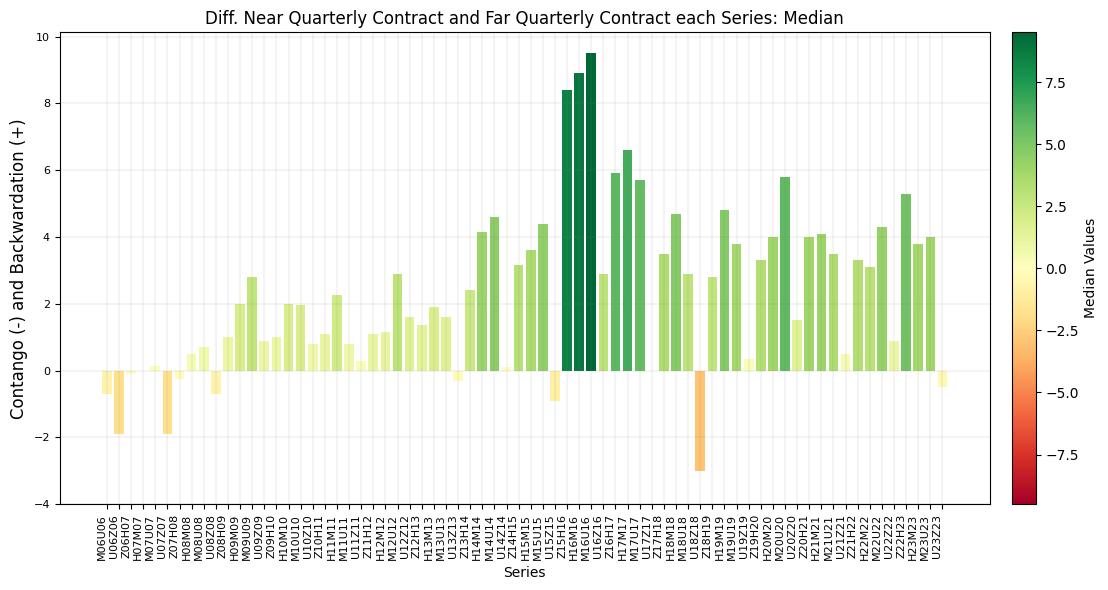

In [14]:
Futures_Plot = nearMonth_farMonth_futuresContract[['Series', 'median']]

series = Futures_Plot['Series']
median_values = Futures_Plot['median']

custom_order = [
    'M06U06', 'U06Z06', 'Z06H07', 
    'H07M07', 'M07U07', 'U07Z07', 'Z07H08', 
    'H08M08', 'M08U08', 'U08Z08', 'Z08H09', 
    'H09M09', 'M09U09', 'U09Z09', 'Z09H10', 
    'H10M10', 'M10U10', 'U10Z10', 'Z10H11', 
    'H11M11', 'M11U11', 'U11Z11', 'Z11H12', 
    'H12M12', 'M12U12', 'U12Z12', 'Z12H13', 
    'H13M13', 'M13U13', 'U13Z13', 'Z13H14', 
    'H14M14', 'M14U14', 'U14Z14', 'Z14H15', 
    'H15M15', 'M15U15', 'U15Z15', 'Z15H16',
    'H16M16', 'M16U16', 'U16Z16', 'Z16H17', 
    'H17M17', 'M17U17', 'U17Z17', 'Z17H18', 
    'H18M18', 'M18U18', 'U18Z18', 'Z18H19', 
    'H19M19', 'M19U19', 'U19Z19', 'Z19H20', 
    'H20M20', 'M20U20', 'U20Z20', 'Z20H21', 
    'H21M21', 'M21U21', 'U21Z21', 'Z21H22', 
    'H22M22', 'M22U22', 'U22Z22', 'Z22H23',
    'H23M23', 'M23U23', 'U23Z23'
]

Futures_Plot['Custom_Order'] = Futures_Plot['Series'].astype(
    pd.CategoricalDtype(categories=custom_order, ordered=True)
)

Futures_Plot_sorted = Futures_Plot.sort_values(by='Custom_Order')
Futures_Plot_sorted = Futures_Plot.drop('Custom_Order', axis=1)

norm = mcolors.Normalize(vmin=-max(abs(median_values)), vmax=max(abs(median_values)))
colors = plt.cm.RdYlGn(norm(median_values))

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(Futures_Plot_sorted['Series'], median_values, color=colors)
ax.set_xlabel('Series', fontsize=10)
ax.set_ylabel('Contango (-) and Backwardation (+)', fontsize=12)
ax.set_title('Diff. Near Quarterly Contract and Far Quarterly Contract each Series: Median')

ax.set_yticks(np.arange(-4, 11, 2))
ax.tick_params(axis='both', which='major', labelsize=8)

sm = plt.cm.ScalarMappable(cmap=plt.cm.RdYlGn, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', pad=0.02)
cbar.set_label('Median Values')

# Customize x-axis labels
ax.set_xticks(range(len(Futures_Plot_sorted['Series'])))
ax.set_xticklabels(Futures_Plot_sorted['Series'], rotation=90, ha='right', fontsize=8)

# Add grid lines with grey50 color and 0.4 opacity
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

# Display the plot
plt.tight_layout()
plt.show()
